In [7]:
import sys
import os

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

sys.path.append(os.path.abspath("../src"))

from visuals.plots import *


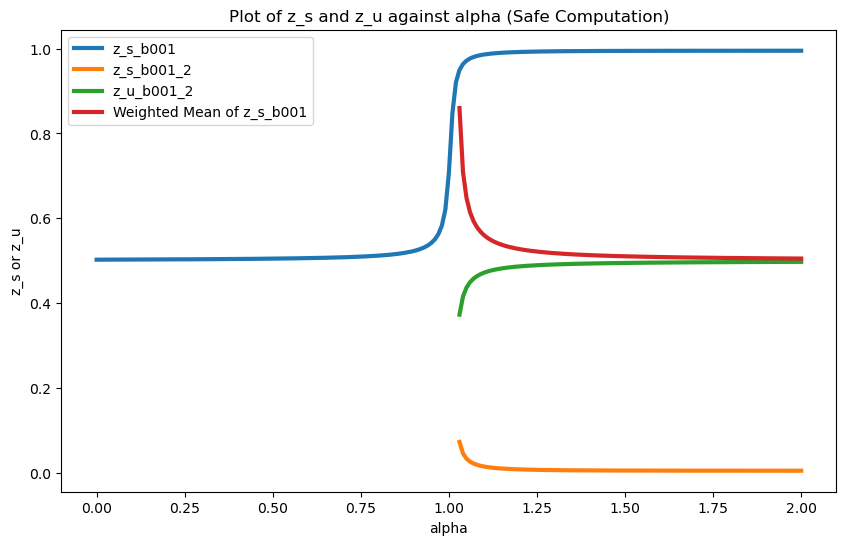

In [8]:
import numpy as np
from scipy.optimize import root_scalar
from matplotlib import pyplot as plt

# Translated functions
def f(z, a):
    return 0.99 * z**a / (z**a + (1 - z)**a) + 0.005

def g(z, a, b=0.01):
    return (1 + b * (1 - f(z, a))) * f(z, a)

def h(z, a, b):
    return g(z, a, b) - z

# Alpha range
alphas_b001 = np.linspace(0, 2, 201)

# Function to compute root sequence safely
def compute_root_sequence_safe(seq, b_value, bracket):
    roots = []
    for a in seq:
        try:
            root = root_scalar(h, args=(a, b_value), bracket=bracket, method='brentq').root
            roots.append(root)
        except ValueError:
            roots.append(np.nan)
    return roots

# Compute roots safely
z_s_b001_safe = compute_root_sequence_safe(alphas_b001, 0.01, [0.5, 0.999])
z_s_b001_2_safe = compute_root_sequence_safe(alphas_b001, 0.01, [0.001, 0.2])
z_u_b001_2_safe = compute_root_sequence_safe(alphas_b001, 0.01, [0.2, 0.5])

# Calculate mean and weighted mean
z_s_b001_mean = np.nanmean([z_s_b001_safe, z_s_b001_2_safe], axis=0)
z_s_b001_weighted_mean = z_s_b001_mean * (1 - np.array(z_u_b001_2_safe)) / np.array(z_u_b001_2_safe)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas_b001, z_s_b001_safe, label="z_s_b001", linewidth=3)
plt.plot(alphas_b001, z_s_b001_2_safe, label="z_s_b001_2", linewidth=3)
plt.plot(alphas_b001, z_u_b001_2_safe, label="z_u_b001_2", linewidth=3)
plt.plot(alphas_b001, z_s_b001_weighted_mean, label="Weighted Mean of z_s_b001", linewidth=3)

plt.xlabel("alpha")
plt.ylabel("z_s or z_u")
plt.title("Plot of z_s and z_u against alpha (Safe Computation)")
plt.legend()
plt.show()


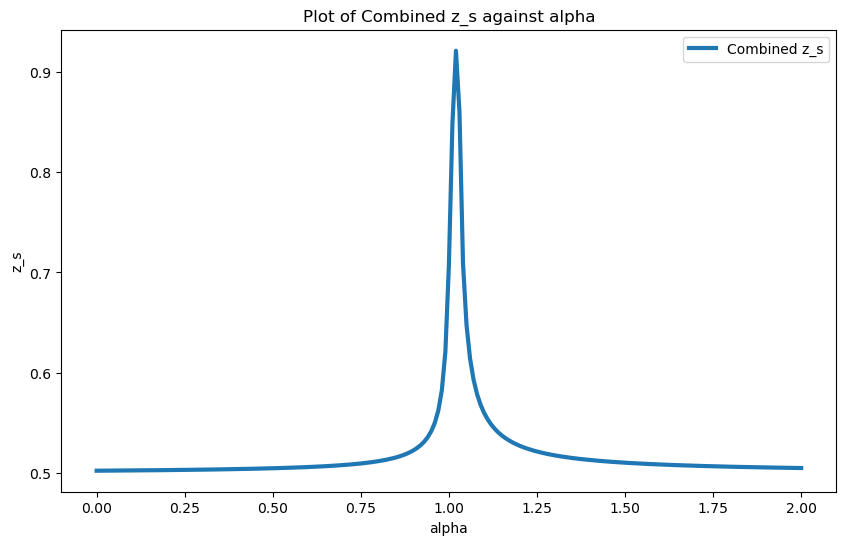

In [9]:
# α = 1.02に対応するインデックスを見つける
alpha_cutoff = 1.02
cutoff_index = np.where(alphas_b001 <= alpha_cutoff)[0][-1]  # α = 1.02までの最後のインデックス

# α = 1.02までの z_s_b001_safe の値を抽出
z_s_b001_safe_cutoff = z_s_b001_safe[:cutoff_index + 1]

# α > 1.02 の範囲で z_s_b001_weighted_mean の値を使用
z_s_b001_weighted_mean_cutoff = z_s_b001_weighted_mean[cutoff_index + 1:]

# 結合されたデータセットを作成
combined_z_s = np.concatenate([z_s_b001_safe_cutoff, z_s_b001_weighted_mean_cutoff])

# 結合されたデータセット用のαの範囲を作成
combined_alphas = alphas_b001[:cutoff_index + 1].tolist() + alphas_b001[cutoff_index + 1:].tolist()

# プロット
plt.figure(figsize=(10, 6))
plt.plot(combined_alphas, combined_z_s, label="Combined z_s", linewidth=3)
plt.xlabel("alpha")
plt.ylabel("z_s")
plt.title("Plot of Combined z_s against alpha")
plt.legend()
plt.show()


In [10]:
alpha0 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.0.csv")
alpha02 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.2.csv")
alpha04 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.4.csv")
alpha05 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.5.csv")
alpha06 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.6.csv")
alpha07 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.7.csv")
alpha08 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha0.8.csv")
alpha1 = pd.read_csv("data/Zt/N100_T1M_r100_omega0.0_alpha1.0.csv")
alpha11 = pd.read_csv("data/Zt/N100_T1M_r100_omega0.0_alpha1.1.csv")
alpha12 = pd.read_csv("data/Zt/N100_T1M_r100_omega0.0_alpha1.2.csv")
alpha13 = pd.read_csv("data/Zt/N100_T1M_r100_omega0.0_alpha1.3.csv")
alpha14 = pd.read_csv("data/Zt/N100_T1M_r100_omega0.0_alpha1.4.csv")
alpha12 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.2.csv")
alpha14 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.4.csv")
alpha16 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.6.csv")
alpha18 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.8.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha06, alpha08, alpha1, alpha12, alpha14, alpha16, alpha18, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha06, alpha08, alpha1, alpha12, alpha14, alpha16, alpha18, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w0 = pd.DataFrame(data)

In [11]:
alpha0 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.0.csv")
alpha02 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.2.csv")
alpha04 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.4.csv")
alpha06 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.6.csv")
alpha08 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.8.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.0.csv")
alpha12 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.2.csv")
alpha14 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.4.csv")
alpha16 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.6.csv")
alpha18 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.8.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha06, alpha08, alpha1, alpha12, alpha14, alpha16, alpha18, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha06, alpha08, alpha1, alpha12, alpha14, alpha16, alpha18, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w1 = pd.DataFrame(data)

In [12]:
alpha0 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha0.0.csv")
alpha02 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha0.2.csv")
alpha04 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha0.4.csv")
alpha06 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha0.6.csv")
alpha08 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha0.8.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha1.0.csv")
alpha12 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha1.2.csv")
alpha14 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha1.4.csv")
alpha16 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha1.6.csv")
alpha18 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha1.8.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega10.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha06, alpha08, alpha1, alpha12, alpha14, alpha16, alpha18, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha06, alpha08, alpha1, alpha12, alpha14, alpha16, alpha18, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w10 = pd.DataFrame(data)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


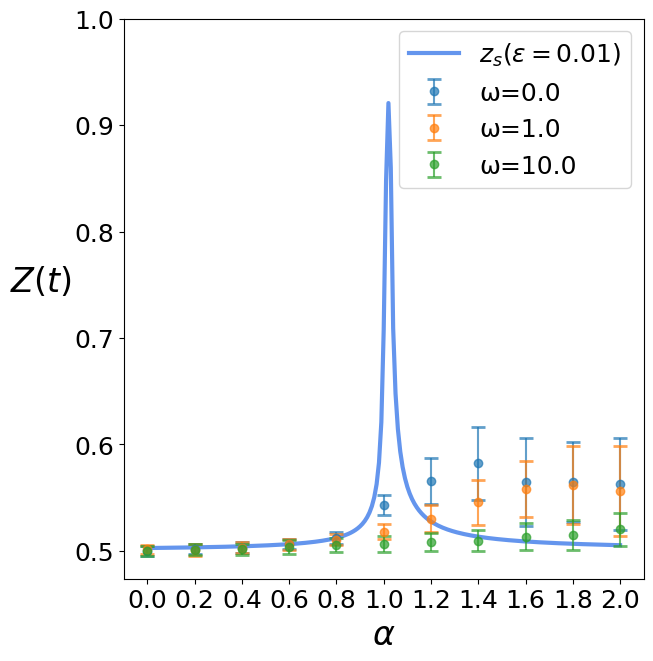

In [13]:
import numpy as np
# プロット作成
plt.figure(figsize=(8, 8))
plt.plot(combined_alphas, combined_z_s, label=r"$z_s(\epsilon=0.01)$", linewidth=3, color='cornflowerblue')
plt.errorbar(plot_df_w0['Alpha'], plot_df_w0['Mean_Z(t)'], yerr=plot_df_w0['Std_Z(t)'], fmt='o', label='ω=0.0', capsize=5, capthick=2, linestyle='', alpha=0.7)
plt.errorbar(plot_df_w1['Alpha'], plot_df_w1['Mean_Z(t)'], yerr=plot_df_w1['Std_Z(t)'], fmt='o', label='ω=1.0', capsize=5, capthick=2, linestyle='', alpha=0.7)
plt.errorbar(plot_df_w10['Alpha'], plot_df_w10['Mean_Z(t)'], yerr=plot_df_w10['Std_Z(t)'], fmt='o', label='ω=10.0', capsize=5, capthick=2, linestyle='', alpha=0.7)
# plt.title("N=100, T=100K, r=100, Final Time Step Value of Z(t) for Each Alpha")
plt.xlabel(r'$\alpha$', fontsize=24)
plt.ylabel(r'$Z(t)$', fontsize=24, rotation=0, labelpad=24)
plt.xticks(np.arange(0, 2.1, 0.2), fontsize=18)
plt.yticks(np.arange(0.5, 1.05, 0.1), fontsize=18)
# plt.grid()
# plt.ylim(0.49, 0.86)
plt.legend(fontsize=18)
plt.subplots_adjust(left=0.20, bottom=0.15, right=0.85, top=0.85) # 余白の調整
plt.savefig("fig/Zt_alpha_omega_posi.eps", dpi=300)
plt.show()

In [14]:
alpha0 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.0.csv")
alpha02 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.2.csv")
alpha04 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.4.csv")
alpha05 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.5.csv")
alpha06 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.6.csv")
alpha07 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.7.csv")
alpha08 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.8.csv")
alpha09 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.03.csv")
alpha105 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.05.csv")
alpha107 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.07.csv")
alpha11 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.1.csv")
alpha12 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.2.csv")
alpha13 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.3.csv")
alpha14 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.4.csv")
alpha15 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.5.csv")
alpha16 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.6.csv")
alpha18 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.8.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
# data = {
#     'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.05, 1.07, 1.1, 1.5, 2.0],
#     'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha105, alpha107, alpha11, alpha15, alpha2]],
#     'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha105, alpha107, alpha11, alpha15, alpha2]]
# }
data = {
        'Alpha': [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.03, 1.05, 1.07, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0],
        'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha05, alpha06, alpha07, alpha08, alpha09, alpha1, alpha103, alpha105, alpha107, alpha11, alpha12, alpha13, alpha14, alpha15, alpha16, alpha18, alpha2]],
        'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha05, alpha06, alpha07, alpha08, alpha09, alpha1, alpha103, alpha105, alpha107, alpha11, alpha12, alpha13, alpha14, alpha15, alpha16, alpha18, alpha2]]
    }

# 新しいデータフレームを作成
plot_df_w_1 = pd.DataFrame(data)

In [15]:
alpha0 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.0.csv")
alpha02 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.2.csv")
alpha04 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.4.csv")
alpha05 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.5.csv")
alpha06 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.6.csv")
alpha07 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.7.csv")
alpha08 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.8.csv")
alpha09 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.1.csv")
alpha12 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.2.csv")
alpha13 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.3.csv")
alpha14 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.4.csv")
alpha15 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.5.csv")
alpha16 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.6.csv")
alpha18 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.8.csv")
alpha2 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha05, alpha06, alpha07, alpha08, alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha12, alpha13, alpha14, alpha15, alpha16, alpha18, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha05, alpha06, alpha07, alpha08, alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha12, alpha13, alpha14, alpha15, alpha16, alpha18, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_099 = pd.DataFrame(data)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


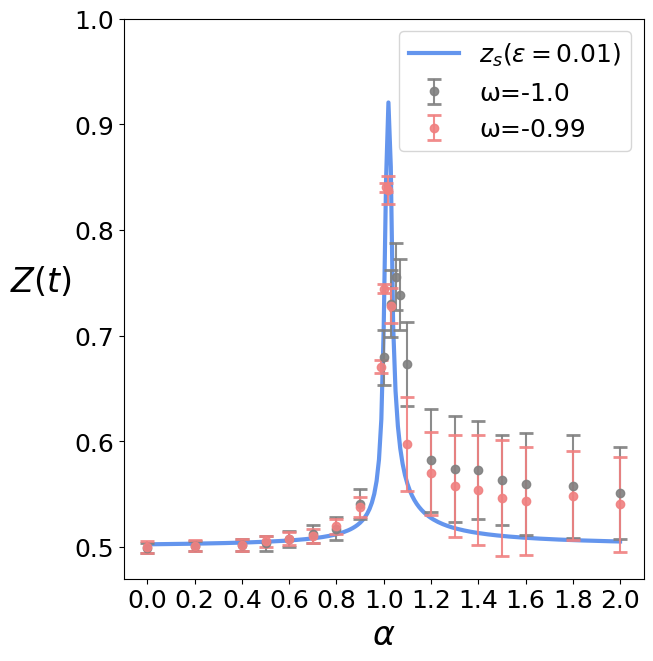

In [16]:
import numpy as np
# プロット作成
plt.figure(figsize=(8, 8))
plt.plot(combined_alphas, combined_z_s, label=r"$z_s(\epsilon=0.01)$", linewidth=3, color='cornflowerblue')
plt.errorbar(plot_df_w_1['Alpha'], plot_df_w_1['Mean_Z(t)'], yerr=plot_df_w_1['Std_Z(t)'], fmt='o', label='ω=-1.0', capsize=5, capthick=2, linestyle='', alpha=0.9, color='gray')
plt.errorbar(plot_df_w_099['Alpha'], plot_df_w_099['Mean_Z(t)'], yerr=plot_df_w_099['Std_Z(t)'], fmt='o', label='ω=-0.99', capsize=5, capthick=2, linestyle='', alpha=0.9, color='lightcoral')
# alpha=1/0.99に点線を引く
# plt.axvline(x=1/0.99, color='gray', linestyle='--', alpha=0.9)
# plt.title("N=100, T=100K, r=100, Final Time Step Value of Z(t) for Each Alpha")
plt.xlabel(r'$\alpha$', fontsize=24)
plt.ylabel(r'$Z(t)$', fontsize=24, rotation=0, labelpad=24)
plt.yticks(np.arange(0.5, 1.05, 0.1))
plt.xticks(np.arange(0, 2.1, 0.2), fontsize=18)
plt.yticks(fontsize=18)
# plt.grid()
# plt.ylim(0.49, 0.86)
plt.legend(fontsize=18)
plt.subplots_adjust(left=0.20, bottom=0.15, right=0.85, top=0.85) # 余白の調整
plt.savefig("fig/Zt_alpha_omega_nega.eps", dpi=300)
plt.show()